In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [271]:
df=pd.read_csv('AAPL.csv')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1237 non-null   object 
 1   Open        1237 non-null   float64
 2   High        1237 non-null   float64
 3   Low         1237 non-null   float64
 4   Close       1237 non-null   float64
 5   Adj Close   1237 non-null   float64
 6   Volume      1237 non-null   int64  
 7   New_Open    1237 non-null   float64
 8   Difference  1237 non-null   float64
 9   ave_5D      1237 non-null   float64
 10  grad_5D     1237 non-null   float64
 11  ave_20D     1237 non-null   float64
 12  grad_20D    1237 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 125.8+ KB


In [273]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'New_Open', 'Difference', 'ave_5D', 'grad_5D', 'ave_20D', 'grad_20D'],
      dtype='object')

In [274]:
dfNoDate = df.drop('Date', axis=1)

In [275]:
dfNoDate.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'New_Open',
       'Difference', 'ave_5D', 'grad_5D', 'ave_20D', 'grad_20D'],
      dtype='object')

In [276]:
np.mean(df[['Difference']])

Difference    0.099181
dtype: float64

In [277]:
dfDiff = df[['Difference']]

array([[<AxesSubplot:title={'center':'Difference'}>]], dtype=object)

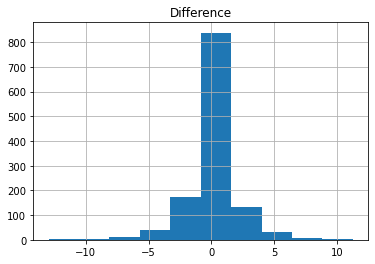

In [278]:
dfDiff.hist()

In [279]:
import statistics

In [280]:
mean = statistics.mean(dfDiff['Difference'])
sd = statistics.stdev(dfDiff['Difference'])

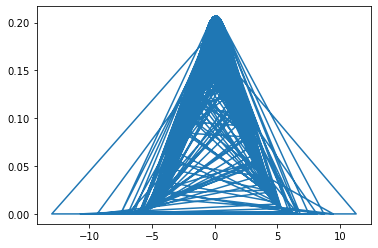

In [281]:
from scipy.stats import norm
plt.plot(dfDiff['Difference'], norm.pdf(dfDiff['Difference'], mean, sd))
plt.show()

In [282]:
sd

1.9307988474117246

In [283]:
mean

0.09918148423605497

In [284]:
dfDiff.head()

,Difference
0,0.067501
1,-0.145000
2,0.137500
3,-0.200000
4,0.102500


conditions1 = [
    (dfDiff['Difference'] <= -3.8),
    (dfDiff['Difference'] < -1.9) & (dfDiff['Difference'] > -3.8),
    (dfDiff['Difference'] <=0) & (dfDiff['Difference'] > -1.9),
    (dfDiff['Difference'] > 0) & (dfDiff['Difference'] < 1.9),
    (dfDiff['Difference'] > 1.9) & (dfDiff['Difference'] <3.8),
    (dfDiff['Difference'] >= 3.8)
    ]

In [285]:
conditions = [
    (dfDiff['Difference'] <= -3.5),
    (dfDiff['Difference'] < -3.0) & (dfDiff['Difference'] > -3.5),
    (dfDiff['Difference'] < -2.5) & (dfDiff['Difference'] > -3.0),
    (dfDiff['Difference'] < -2.0) & (dfDiff['Difference'] > -2.5),
    (dfDiff['Difference'] < -1.5) & (dfDiff['Difference'] > -2.0),
    (dfDiff['Difference'] <-1.0) & (dfDiff['Difference'] > -1.5),
    (dfDiff['Difference'] <-0.5) & (dfDiff['Difference'] > -1.0),
    (dfDiff['Difference'] <=0) & (dfDiff['Difference'] > -0.5),
    (dfDiff['Difference'] > 0) & (dfDiff['Difference'] < 0.125),
    (dfDiff['Difference'] > 0.125) & (dfDiff['Difference'] < 0.25),
    (dfDiff['Difference'] > 0.25) & (dfDiff['Difference'] < 0.5),
    (dfDiff['Difference'] > 0.5) & (dfDiff['Difference'] < 0.75),
    (dfDiff['Difference'] > 0.75) & (dfDiff['Difference'] < 1.0),
    (dfDiff['Difference'] > 1.0) & (dfDiff['Difference'] < 1.5),
    (dfDiff['Difference'] > 1.5) & (dfDiff['Difference'] < 2.0),
    (dfDiff['Difference'] > 2.0) & (dfDiff['Difference'] < 2.5),
    (dfDiff['Difference'] > 2.5) & (dfDiff['Difference'] < 3.0),
    (dfDiff['Difference'] > 3.0) & (dfDiff['Difference'] < 3.5),
    (dfDiff['Difference'] >= 3.5)
    ]

In [286]:
values = ['n8h', 'n7h', 'n6h', 'n5h', 'n4h', 'n3h','n2h', 'n1h', 'p1qA', 'p1qB', 'p2q','p3q','p4q','p3h', 'p4h','p5h', 'p6h', 'p7h', 'p8h']

In [287]:
df['deviation'] = np.select(conditions, values)

In [288]:
df.head()
dfNoDate = df.drop('Date', axis=1)

In [289]:
from sklearn.model_selection import train_test_split
X=dfNoDate.drop('deviation', axis=1)
y=dfNoDate['deviation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [290]:
dfNoDate.head()

,Open,High,Low,Close,Adj Close,Volume,New_Open,Difference,ave_5D,grad_5D,ave_20D,grad_20D,deviation
0,38.432499,38.587502,38.257500,38.467499,36.415878,76942400,38.5000,0.067501,38.494499,-0.0290,38.505875,0.020250,p1qA
1,38.500000,38.560001,38.327499,38.402500,36.354336,87710400,38.3550,-0.145000,38.448000,-0.0465,38.540125,0.034250,n1h
2,38.355000,38.607498,38.332500,38.417500,36.368538,80507600,38.4925,0.137500,38.414500,-0.0335,38.428125,-0.112000,p1qB
3,38.492500,38.542500,38.095001,38.189999,36.153168,97804800,38.2925,-0.200000,38.407000,-0.0075,38.317500,-0.110625,n1h
4,38.292500,38.332500,38.055000,38.294998,36.252579,65616400,38.3950,0.102500,38.424000,0.0170,38.212000,-0.105500,p1qA


In [291]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)

In [292]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=128)

In [293]:
rfc_pred = rfc.predict(X_test)

In [294]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test, rfc_pred))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 72  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 37  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  3  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  2  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  5  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  1  1 37  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  2  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  1 30  1  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  4  0  7  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  4  0  6  0  0

/Users/angkianguan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/angkianguan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/angkianguan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [267]:
df_pred = pd.read_csv('AAPL_pred.csv')

In [268]:
rfc_pred = rfc.predict(df_pred)

In [269]:
rfc_pred

array(['p1qA'], dtype=object)

In [1]:
import joblib

In [3]:
joblib.dump(rfc, 'model.sav')

NameError: name 'rfc' is not defined